In [3]:
import pandas as pd
import numpy as np
from copy import deepcopy
import mplsoccer
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
maindf = pd.read_csv("E:\masproject\data.csv", low_memory=False)
maindf.head(10)


,match_id,id,index,period,timestamp,minute,second,possession,duration,type.id,...,home_team.home_team_name,away_team.away_team_id,away_team.away_team_name,jersey_number,started,subID,minMinute,maxMinute,maxMinsMatch,minsPlayed
0,303421,99d03ac6-bd7b-452a-91be-32e28f96bc1c,1,1,00:00.0,0,0,1,0.000000,35,...,Deportivo Alavés,217,Barcelona,NaN,NaN,NaN,NaN,94,94,NaN
1,303421,45e9a850-9a07-4266-8c05-66565e7ac83c,2,1,00:00.0,0,0,1,0.000000,35,...,Deportivo Alavés,217,Barcelona,NaN,NaN,NaN,NaN,94,94,NaN
2,303421,715a7900-5e3a-41f6-9870-44dc657ba2bc,3,1,00:00.0,0,0,1,0.000000,18,...,Deportivo Alavés,217,Barcelona,NaN,NaN,NaN,NaN,94,94,NaN
3,303421,9df4334c-c6e4-4457-97f2-8948375695c7,4,1,00:00.0,0,0,1,0.000000,18,...,Deportivo Alavés,217,Barcelona,NaN,NaN,NaN,NaN,94,94,NaN
4,303421,1a45cc07-8721-46a1-81eb-ac83d3e44b6d,5,1,00:00.6,0,0,2,1.235451,30,...,Deportivo Alavés,217,Barcelona,9.0,Yes,NaN,0.0,94,94,94.0
5,303421,087f53e9-22aa-48fb-b8bf-0a294b8c3262,6,1,00:01.9,0,1,2,NaN,42,...,Deportivo Alavés,217,Barcelona,5.0,Yes,NaN,0.0,58,94,58.0
6,303421,c16adabc-7b2e-45a9-9389-906864aaff46,7,1,00:03.4,0,3,2,1.656018,30,...,Deportivo Alavés,217,Barcelona,5.0,Yes,NaN,0.0,58,94,58.0
7,303421,b2298527-b4b5-4e60-a2ae-c1d91c500337,8,1,00:05.1,0,5,2,NaN,42,...,Deportivo Alavés,217,Barcelona,15.0,Yes,NaN,0.0,49,94,49.0
8,303421,1906351d-f3d0-4388-8613-623ab7433ec8,9,1,00:05.1,0,5,2,0.401994,43,...,Deportivo Alavés,217,Barcelona,15.0,Yes,NaN,0.0,49,94,49.0
9,303421,5c21c429-9f0d-49b3-9288-7feabb75fc7c,10,1,00:05.5,0,5,2,1.512557,30,...,Deportivo Alavés,217,Barcelona,15.0,Yes,NaN,0.0,49,94,49.0


In [9]:
maindf.columns

Index(['match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type.id',
       ...
       'home_team.home_team_name', 'away_team.away_team_id',
       'away_team.away_team_name', 'jersey_number', 'started', 'subID',
       'minMinute', 'maxMinute', 'maxMinsMatch', 'minsPlayed'],
      dtype='object', length=155)

In [11]:
passdf = deepcopy(maindf[maindf["type.id"] == 30])
passdf.columns[passdf.columns.str.startswith("pass")]

Index(['pass.recipient.id', 'pass.recipient.name', 'pass.length', 'pass.angle',
       'pass.height.id', 'pass.height.name', 'pass.end_location',
       'pass.body_part.id', 'pass.body_part.name', 'pass.type.id',
       'pass.type.name', 'pass.outcome.id', 'pass.outcome.name',
       'pass.assisted_shot_id', 'pass.shot_assist', 'pass.aerial_won',
       'pass.deflected', 'pass.switch', 'pass.cross', 'pass.through_ball',
       'pass.technique.id', 'pass.technique.name', 'pass.goal_assist',
       'pass.no_touch', 'pass.outswinging', 'pass.cut_back', 'pass.inswinging',
       'pass.straight', 'pass.miscommunication'],
      dtype='object')

In [12]:
miscpass = ['match_id', 'id', 'timestamp', 'minute', 'second', 'type.id', 'type.name', 'possession_team.id', 'possession_team.name', 'play_pattern.id', 'play_pattern.name', 'team.id', 'team.name', 'location', 'player.id', 'player.name', 'position.id', 'position.name', 'under_pressure', 'started', 'minsPlayed']
pass_cols = passdf.columns[passdf.columns.str.startswith("pass")].tolist()
pass_cols = miscpass + pass_cols
pass_cols

['match_id',
 'id',
 'timestamp',
 'minute',
 'second',
 'type.id',
 'type.name',
 'possession_team.id',
 'possession_team.name',
 'play_pattern.id',
 'play_pattern.name',
 'team.id',
 'team.name',
 'location',
 'player.id',
 'player.name',
 'position.id',
 'position.name',
 'under_pressure',
 'started',
 'minsPlayed',
 'pass.recipient.id',
 'pass.recipient.name',
 'pass.length',
 'pass.angle',
 'pass.height.id',
 'pass.height.name',
 'pass.end_location',
 'pass.body_part.id',
 'pass.body_part.name',
 'pass.type.id',
 'pass.type.name',
 'pass.outcome.id',
 'pass.outcome.name',
 'pass.assisted_shot_id',
 'pass.shot_assist',
 'pass.aerial_won',
 'pass.deflected',
 'pass.switch',
 'pass.cross',
 'pass.through_ball',
 'pass.technique.id',
 'pass.technique.name',
 'pass.goal_assist',
 'pass.no_touch',
 'pass.outswinging',
 'pass.cut_back',
 'pass.inswinging',
 'pass.straight',
 'pass.miscommunication']

In [15]:
passdf = passdf[pass_cols]

In [16]:
passdf.select_dtypes(include="category").columns

Index([], dtype='object')

In [17]:
passdf.select_dtypes(include="object").columns

Index(['id', 'timestamp', 'type.name', 'possession_team.name',
       'play_pattern.name', 'team.name', 'location', 'player.name',
       'position.name', 'under_pressure', 'started', 'pass.recipient.name',
       'pass.height.name', 'pass.end_location', 'pass.body_part.name',
       'pass.type.name', 'pass.outcome.name', 'pass.assisted_shot_id',
       'pass.shot_assist', 'pass.aerial_won', 'pass.deflected', 'pass.switch',
       'pass.cross', 'pass.through_ball', 'pass.technique.name',
       'pass.goal_assist', 'pass.no_touch', 'pass.outswinging',
       'pass.cut_back', 'pass.inswinging', 'pass.straight',
       'pass.miscommunication'],
      dtype='object')

In [18]:
#converting objects into categoricals
catPassCols = passdf.select_dtypes(include="object").columns
catPassCols

Index(['id', 'timestamp', 'type.name', 'possession_team.name',
       'play_pattern.name', 'team.name', 'location', 'player.name',
       'position.name', 'under_pressure', 'started', 'pass.recipient.name',
       'pass.height.name', 'pass.end_location', 'pass.body_part.name',
       'pass.type.name', 'pass.outcome.name', 'pass.assisted_shot_id',
       'pass.shot_assist', 'pass.aerial_won', 'pass.deflected', 'pass.switch',
       'pass.cross', 'pass.through_ball', 'pass.technique.name',
       'pass.goal_assist', 'pass.no_touch', 'pass.outswinging',
       'pass.cut_back', 'pass.inswinging', 'pass.straight',
       'pass.miscommunication'],
      dtype='object')

In [20]:
complements = ["player.name", "pass.recipient.name", "pass.end_location", "location", "pass.assisted_shot_id", "id", "timestamp", "position.name", "possession_team.name", "team.name", "type.name"]
catPassCols.symmetric_difference(complements)

Index(['pass.aerial_won', 'pass.body_part.name', 'pass.cross', 'pass.cut_back',
       'pass.deflected', 'pass.goal_assist', 'pass.height.name',
       'pass.inswinging', 'pass.miscommunication', 'pass.no_touch',
       'pass.outcome.name', 'pass.outswinging', 'pass.shot_assist',
       'pass.straight', 'pass.switch', 'pass.technique.name',
       'pass.through_ball', 'pass.type.name', 'play_pattern.name', 'started',
       'under_pressure'],
      dtype='object')

In [21]:
catPassCols = catPassCols.symmetric_difference(complements)
catPassCols.__len__()

21

In [23]:
passdf["pass.height.name"] = passdf["pass.height.name"].astype("category")
passdf[catPassCols] = passdf[catPassCols].astype("category")
passdf.select_dtypes(exclude=["object", "category"]).columns

Index(['match_id', 'minute', 'second', 'type.id', 'possession_team.id',
       'play_pattern.id', 'team.id', 'player.id', 'position.id', 'minsPlayed',
       'pass.recipient.id', 'pass.length', 'pass.angle', 'pass.height.id',
       'pass.body_part.id', 'pass.type.id', 'pass.outcome.id',
       'pass.technique.id'],
      dtype='object')

In [24]:
numPassCols = ['pass.length', 'pass.angle', 'minsPlayed']

In [25]:
passdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37157 entries, 4 to 129055
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   match_id               37157 non-null  int64   
 1   id                     37157 non-null  object  
 2   timestamp              37157 non-null  object  
 3   minute                 37157 non-null  int64   
 4   second                 37157 non-null  int64   
 5   type.id                37157 non-null  int64   
 6   type.name              37157 non-null  object  
 7   possession_team.id     37157 non-null  int64   
 8   possession_team.name   37157 non-null  object  
 9   play_pattern.id        37157 non-null  int64   
 10  play_pattern.name      37157 non-null  category
 11  team.id                37157 non-null  int64   
 12  team.name              37157 non-null  object  
 13  location               37157 non-null  object  
 14  player.id              37157 non-null

In [27]:
passdf[["pass.outcome.id", "pass.outcome.name"]].drop_duplicates()

,pass.outcome.id,pass.outcome.name
4,NaN,NaN
46,9.0,Incomplete
219,76.0,Pass Offside
435,75.0,Out
1366,77.0,Unknown
1985,74.0,Injury Clearance


In [28]:
passdf["pass.outcome.id"] = np.where(passdf["pass.outcome.id"].isnull(), 1, passdf["pass.outcome.id"])
passdf["pass.outcome.name"] = np.where(passdf["pass.outcome.name"].isnull(), "Complete", passdf["pass.outcome.name"])

In [30]:
booleanCols = ["under_pressure", "pass.shot_assist", "pass.aerial_won", "pass.deflected", "pass.switch", "pass.cross", "pass.through_ball", "pass.goal_assist", "pass.no_touch", "pass.outswinging", "pass.cut_back", "pass.inswinging", "pass.straight", "pass.miscommunication"]
passdf[booleanCols]
for col in booleanCols:
    try:
        passdf[col] = passdf[col].cat.add_categories(False)
    except ValueError:
        print(sys.exc_info())
    passdf[col] = passdf[col].fillna(False)   

In [31]:
passdf[booleanCols]

,under_pressure,pass.shot_assist,pass.aerial_won,pass.deflected,pass.switch,pass.cross,pass.through_ball,pass.goal_assist,pass.no_touch,pass.outswinging,pass.cut_back,pass.inswinging,pass.straight,pass.miscommunication
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129045,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129047,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129049,False,False,False,False,False,False,False,False,False,False,False,False,False,False
129052,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
for col in catPassCols:
    print(col, "\n", round(passdf[col].value_counts(normalize=True)*100, 3), "\n")

pass.aerial_won 
 False    98.958
True      1.042
Name: pass.aerial_won, dtype: float64 

pass.body_part.name 
 Right Foot    61.264
Left Foot     34.405
Head           2.812
Keeper Arm     0.831
Other          0.319
Drop Kick      0.190
No Touch       0.179
Name: pass.body_part.name, dtype: float64 

pass.cross 
 False    98.232
True      1.768
Name: pass.cross, dtype: float64 

pass.cut_back 
 False    99.857
True      0.143
Name: pass.cut_back, dtype: float64 

pass.deflected 
 False    99.828
True      0.172
Name: pass.deflected, dtype: float64 

pass.goal_assist 
 False    99.822
True      0.178
Name: pass.goal_assist, dtype: float64 

pass.height.name 
 Ground Pass    71.349
High Pass      14.474
Low Pass       14.178
Name: pass.height.name, dtype: float64 

pass.inswinging 
 False    99.68
True      0.32
Name: pass.inswinging, dtype: float64 

pass.miscommunication 
 False    99.941
True      0.059
Name: pass.miscommunication, dtype: float64 

pass.no_touch 
 False    99.828
Tru

Here we aim to generate Pass Maps

In [41]:
df1 = passdf[passdf["match_id"] == 303470]
df = df1[df1["team.id"] == 220]

In [34]:
df["location"].head() #action started here

4     [60.0, 40.0]
6     [43.8, 40.4]
9     [35.6, 31.4]
12    [40.8, 39.8]
15    [49.2, 20.6]
Name: location, dtype: object

In [42]:
df["pass.end_location"].head() #action ends here

79287    [53.2, 43.5]
79290    [47.1, 36.9]
79293    [47.1, 31.0]
79296    [47.4, 37.1]
79298    [46.6, 29.8]
Name: pass.end_location, dtype: object

In [43]:
df["pass.end_location"].str.split(", ", expand=True)[1].str[:-1].apply(pd.to_numeric)
df["startX"] = df["location"].str.split(", ", expand=True)[0].str[1:].apply(pd.to_numeric)
df["startY"] = df["location"].str.split(", ", expand=True)[1].str[:-1].apply(pd.to_numeric)

df["endX"] = df["pass.end_location"].str.split(", ", expand=True)[0].str[1:].apply(pd.to_numeric)
df["endY"] = df["pass.end_location"].str.split(", ", expand=True)[1].str[:-1].apply(pd.to_numeric)


C:\Users\Sumit\AppData\Local\Temp\ipykernel_7436\2838386629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["startX"] = df["location"].str.split(", ", expand=True)[0].str[1:].apply(pd.to_numeric)
C:\Users\Sumit\AppData\Local\Temp\ipykernel_7436\2838386629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["startY"] = df["location"].str.split(", ", expand=True)[1].str[:-1].apply(pd.to_numeric)
C:\Users\Sumit\AppData\Local\Temp\ipykernel_7436\2838386629.py:5: SettingWithCopyWarning: 
A value is try

Text(0.5, 1.0, 'Pass Map of Real Madrid Against Barcelona')

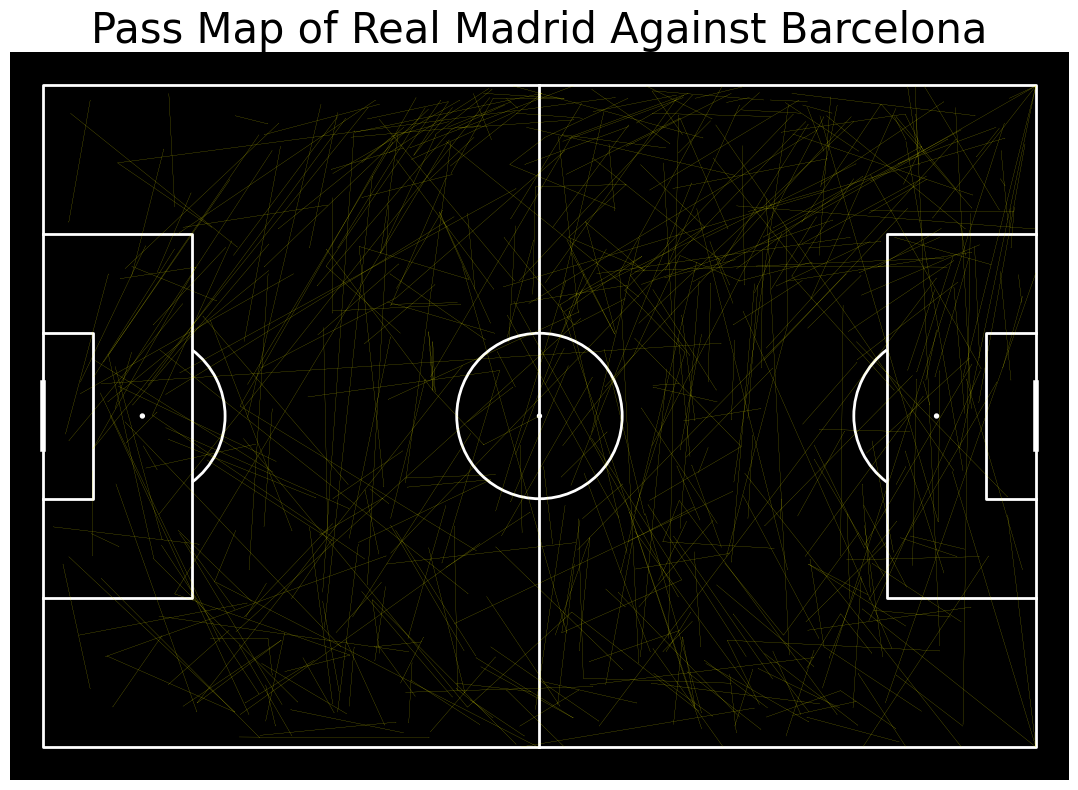

In [48]:
pitch = mplsoccer.Pitch(pitch_color='#000000', line_color='white')
fig, ax = pitch.draw(figsize=(14, 8))
arrows = pitch.arrows(df["startX"], df["startY"], df["endX"], df["endY"], ax=ax, width=.1, color="yellow")
ax.set_title("Pass Map of Real Madrid Against Barcelona", fontsize=30)